# **Import necessary libraries**

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import numpy as np


**Load the Titanic dataset**


In [ ]:
df = pd.read_csv('/content/tested.csv')


# **Explore the dataset**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN         NaN         NaN  Kelly, Mr. James  male   
freq            NaN         NaN         NaN                 1   266   
mean    1100.500000    0.363636    2.265550               NaN   NaN   
std      120.810458    0.481622    0.841838               NaN   NaN   
min      892.000000    0.000000    1.000000               NaN   NaN   
25%      996.250000    0.000000    1.000000               NaN   NaN   
50%     1100.500000    0.000000    3.000000               NaN   NaN   
75%     1204.750000    1.000000    3.000000               NaN   NaN   
max     1309.000000    1.000000    3.000000               NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   332.000000  418.000000  418.000000       418  417.000000   
unique     

# **Missing values**

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

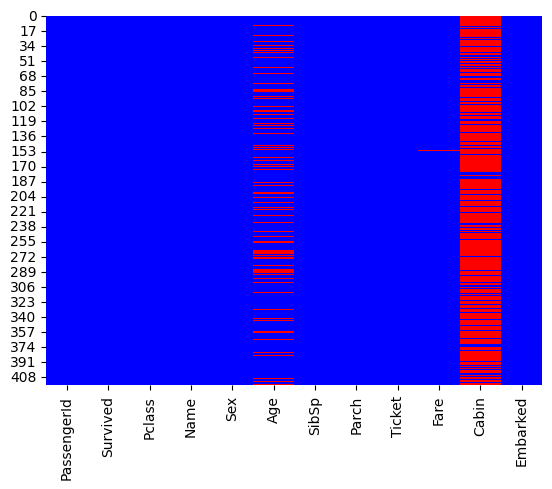

In [ ]:
sns.heatmap(df.isnull(), cmap='bwr', cbar=False)

In [ ]:
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)

In [ ]:
df['Fare'].replace(np.nan, df['Fare'].mean(), inplace=True)


In [ ]:
df.drop('Cabin', axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Display the count of missing values after handling missing data

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Display the number of unique values for each column

In [ ]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

Separate list of categorical and numerical variables

In [ ]:
cat_var = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
num_var = ['Age', 'Fare']

Calculate the percentage distribution of Survived variable and round to 2 decimal places

In [ ]:
round(df['Survived'].value_counts(normalize=True)*100, 2)

0    63.64
1    36.36
Name: Survived, dtype: float64

# **Create a countplot for 'Survived'**

<ipython-input-20-88665c177996>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Survived'], palette='RdBu')


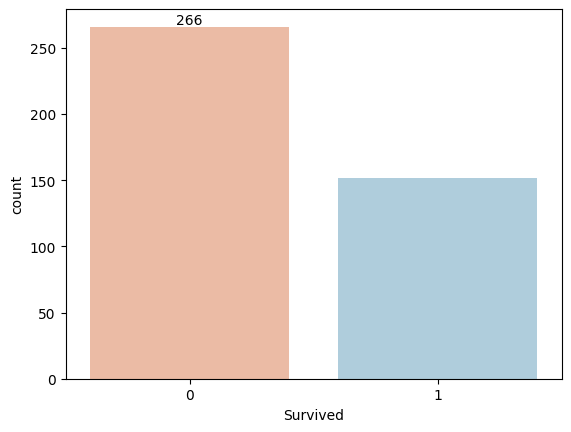

In [ ]:
ax = sns.countplot(x=df['Survived'], palette='RdBu')
ax.bar_label(ax.containers[0])
plt.show()

<ipython-input-21-95d8018f83df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Accent')


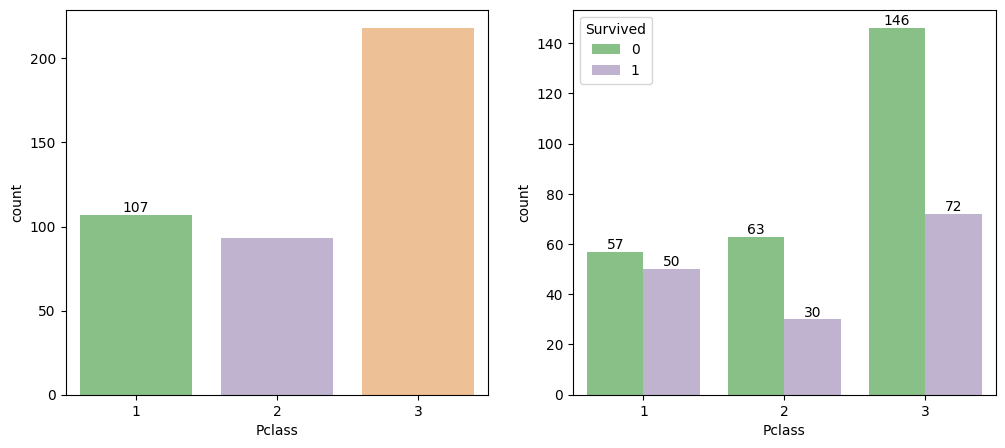

<ipython-input-21-95d8018f83df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Accent')


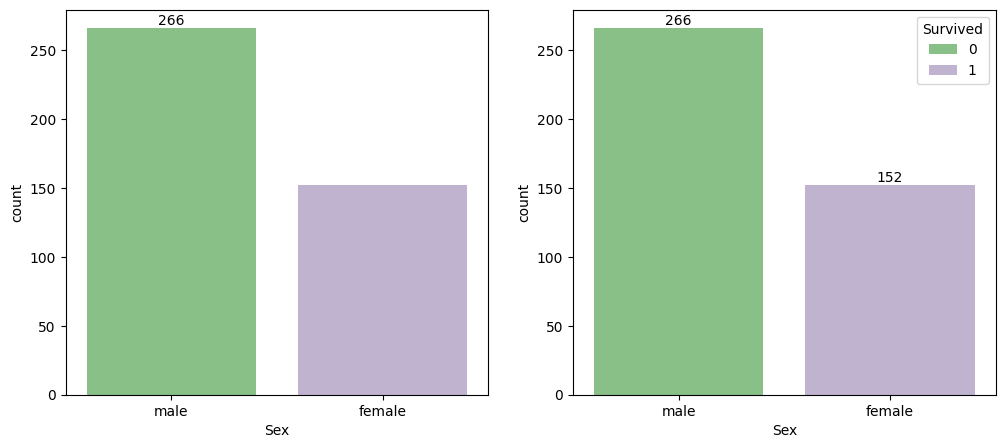

<ipython-input-21-95d8018f83df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Accent')


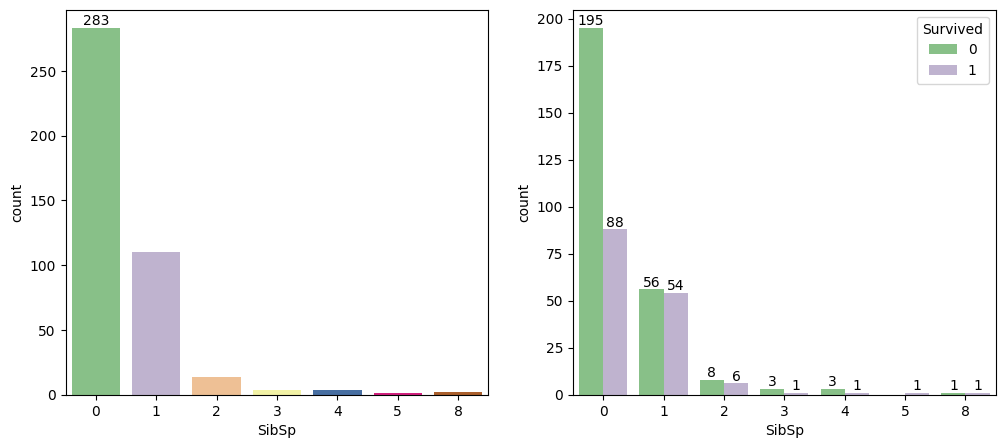

<ipython-input-21-95d8018f83df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Accent')


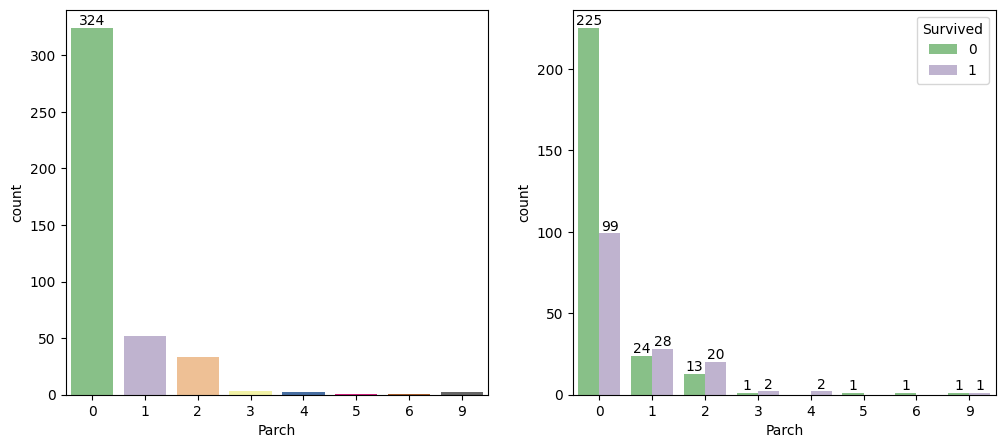

<ipython-input-21-95d8018f83df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Accent')


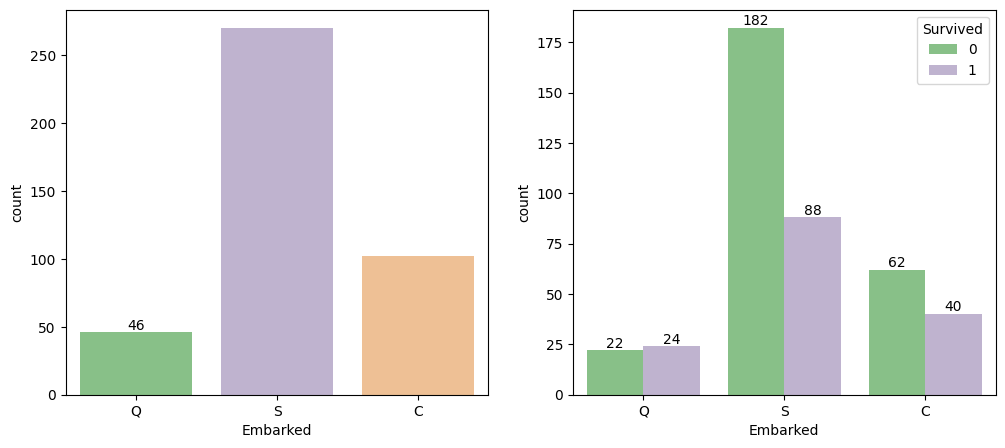

In [ ]:
# Loop through categorical variables
for column in cat_var:
    plt.figure(figsize=(12,5))

 # Plot count for each category
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df, palette='Accent')
    ax.bar_label(ax.containers[0])

# Plot count for each category with 'Survived' as hue
    plt.subplot(1,2,2)
    ax = sns.countplot(x=column, data=df, hue='Survived', palette='Accent')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

Display summary statistics for numerical variables

In [ ]:
df[num_var].describe()

,Age,Fare
count,418.000000,418.000000
mean,30.272590,35.627188
std,12.634534,55.840500
min,0.170000,0.000000
25%,23.000000,7.895800
50%,30.272590,14.454200
75%,35.750000,31.500000
max,76.000000,512.329200


<ipython-input-23-1fb7a21e2e9d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[column])


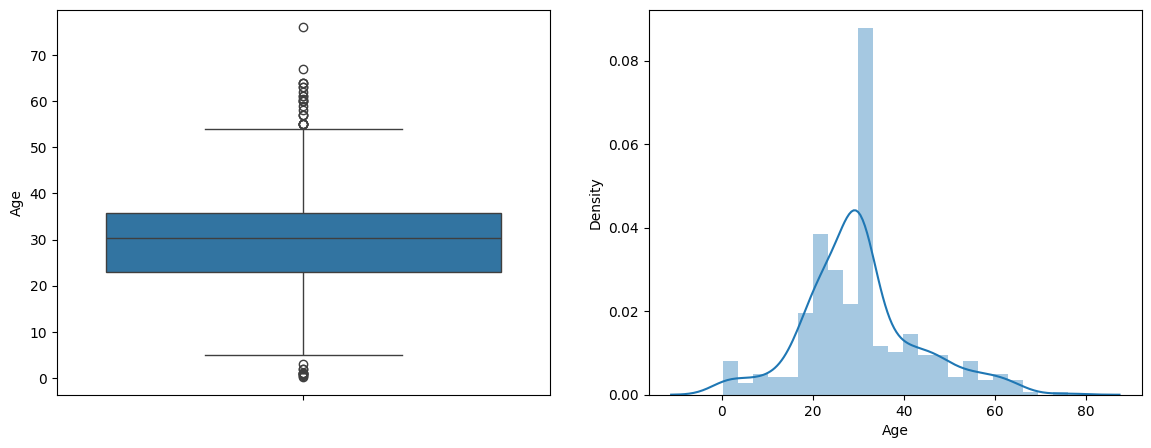

<ipython-input-23-1fb7a21e2e9d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[column])


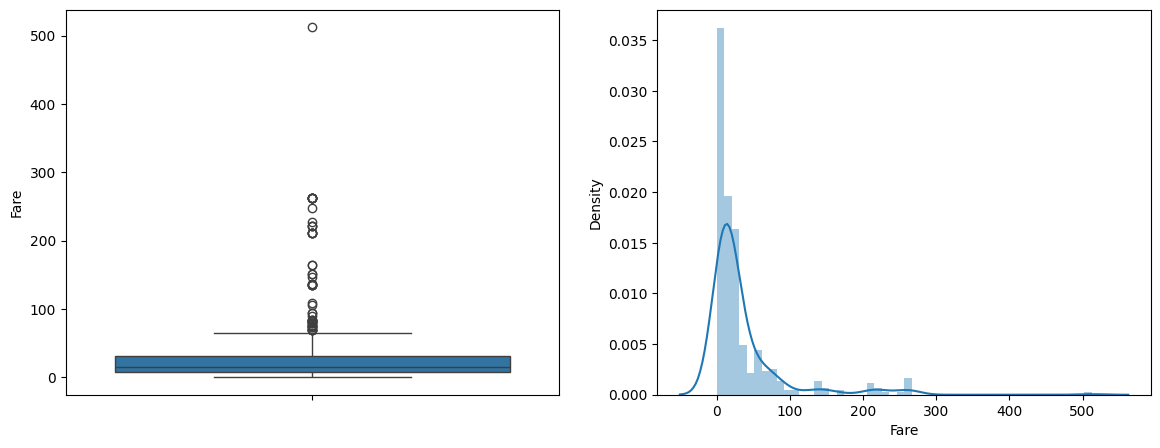

In [ ]:
for column in num_var:
    plt.figure(figsize=(14,5))

# Boxplot
    plt.subplot(1,2,1)
    ax = sns.boxplot(df[column])

# Distribution plot
    plt.subplot(1,2,2)
    ax = sns.distplot(df[column])
    plt.show()

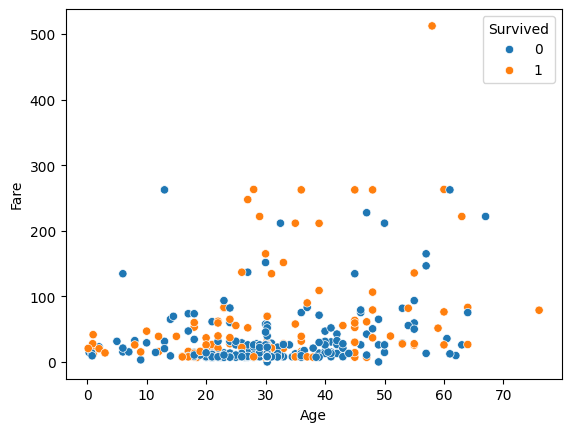

In [ ]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

Scatter plot with Age on the x-axix, Fare on the y-axis and coloured by Pclass

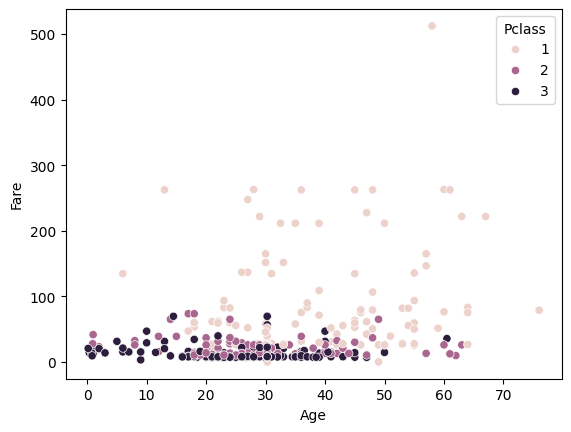

In [ ]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass')
plt.show()

Drop specified features from the Data Frame

In [ ]:
df_update = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [ ]:
# Replace 'male' with 1 and 'female' with 0 in the 'Sex' column

df_update['Sex'].replace({'male':1, 'female':0}, inplace=True)
# Replace 'Q' with 0, 'S' with 1, and 'C' with 2 in the 'Embarked' column

df_update['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


Create a heatmap of the correlation matrix

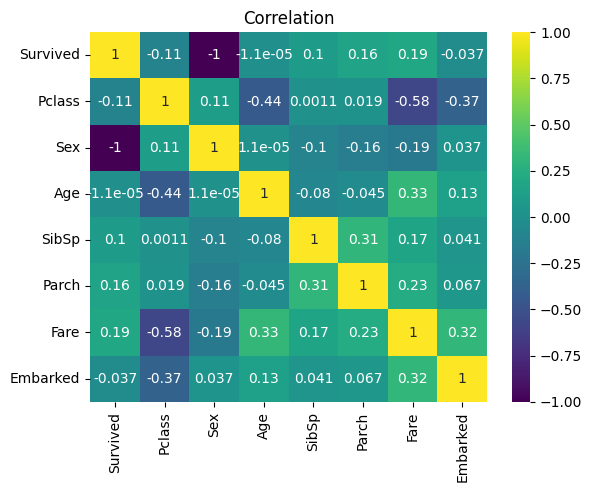

In [ ]:
sns.heatmap(df_update.corr(), annot=True, cmap='viridis')
plt.title('Correlation')
plt.show()

# **Construct and Evaluate Models**

### **Logistic regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
X = df_update.drop('Survived', axis=1)
y = df_update['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


**Split data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
LR.coef_

array([[-1.74124850e-02, -6.13296513e+00,  1.66648140e-04,
         6.07157074e-02, -1.04665099e-02,  4.61842972e-03,
        -2.33451352e-01]])

In [ ]:
LR.intercept_

array([2.8408376])

In [ ]:
y_pred_train = LR.predict(X_train)

In [ ]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


**Saved predictions**

In [ ]:
y_pred_LR = LR.predict(X_test)

**Print out the predicted labels**

In [ ]:
LR.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred_LR))
print('Precision: ', precision_score(y_test, y_pred_LR))
print('Recall: ', recall_score(y_test, y_pred_LR))
print('F1 Score: ', f1_score(y_test, y_pred_LR))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


### **Create Confusion Matrix**

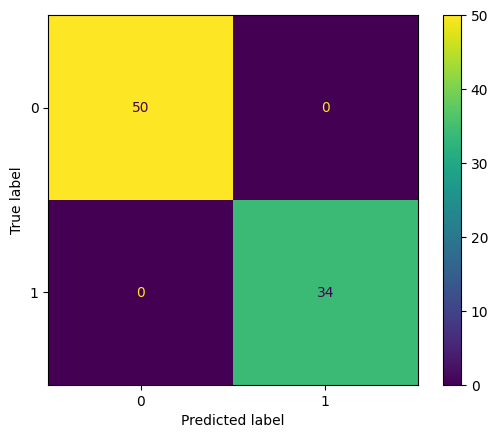

In [ ]:
cm = confusion_matrix(y_test, y_pred_LR, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot();

### **K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))
print('F1 Score: ', f1_score(y_test, y_pred_knn))

Accuracy:  0.6190476190476191
Precision:  0.5555555555555556
Recall:  0.29411764705882354
F1 Score:  0.3846153846153846


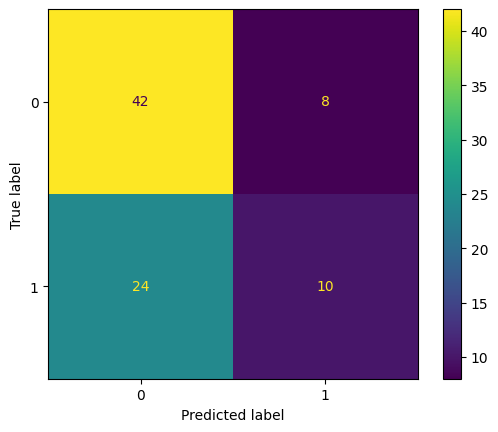

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred_tree))
print('Precision: ', precision_score(y_test, y_pred_tree))
print('Recall: ', recall_score(y_test, y_pred_tree))
print('F1 Score: ', f1_score(y_test, y_pred_tree))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


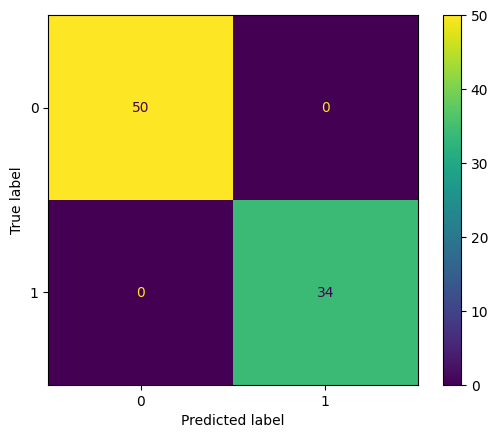

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot();

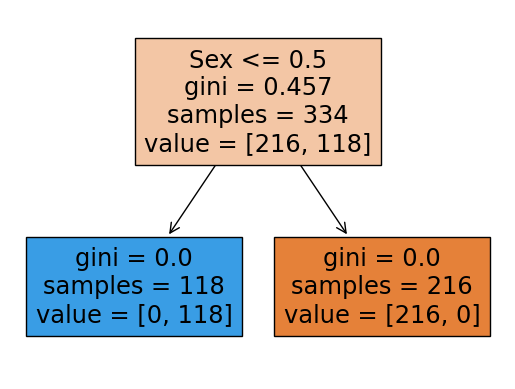

In [ ]:
from sklearn.tree import plot_tree
plot_tree(tree, filled=True, feature_names=list(X.columns))
plt.show()

Conclusion: In the Titanic dataset, 36.36% of passengers survived, while 63.64% did not survive. All females survived, whereas none of the males survived. A significant number of passengers in classes 3 and 2 did not survive. Passengers without siblings/spouses or parents/children aboard had lower chances of survival. Those embarking from Queenstown had a higher likelihood of survival, while those embarking from Southampton had lower chances.

Both the Logistic Regression and Decision Tree models achieved 100% accuracy